<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h1 style="padding: 10px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Transformacija podataka</h1>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Prikupljanje i predobrada podataka za Mašinsko učenje</h2>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Učitavanje biblioteka</h2>
</div>

In [148]:
#Ucitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn.preprocessing import  LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Učitavanje datasetova</h2>
</div>

Zbog specificnosti transforamcija i uslova koje zahtevaju, kao i različitosti skupova podataka, odluka je da se demonstriranje vrši na tri različita skupa podataka

Prvi skup se odnosi na predikciju da li će korisnik banke oročiti novac. Podaci su rezultati kampanje portugalske banke. <br>
Drugi skup sadrži podatke o korisnicima aviokompanije kao i rezultate ankete korisničkog iskustva koju su oni popunjavali. Cilj je predvideti da li je korisnik zadovoljan <br>
Treci skup podataka je drugačiji od prva dva, u pitanju je generisan saobraćaj vozila u Denveru pomoću SUMO simulatora. Samim tim, ovde nema output labele pa nema ni predikcije. Cilj je iskoristiti saobraćaj generisan u različitim delovima dana, demonstrirati različite statističke parametre za svaki deo dana kako bi se shvatila promena raspodele podataka i tako pokazati da promena distribucije itekako može napraviti problem pri pravljenju modela.

In [149]:
#Ucitavanje datasetova
airlineDataset = pd.read_csv("data/airlineData.csv")
bankDataset = pd.read_csv("data/bankData.csv", sep=';')
vehiclesDataset = pd.read_csv("data/vehiclesData.csv")

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Enkodiranje kategorickih atributa</h2>
</div>

Cilj ovog dela jeste prvobitno enkodirati atribute prateći teorijske osnove i savete. Nakon toga, iskoristiti LabelEncoder nad svim atributima a zatim i OneHotEncoder i uporediti performanse na različitim algoritmima mašinskog učenja.

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Bank dataset</h3>
</div>

In [150]:
#Enkodiranje output varijable i pravljenje novih skupova

label_encoder = LabelEncoder()
label_encoder.fit(bankDataset["y"])
bankDataset["y"] = label_encoder.transform(bankDataset["y"])

#Kopiranje originalnog u pomocne datasetove
bankDataset.dropna()
bankDataset_MixEncoding = bankDataset.copy()
bankDataset_LabelEncoding = bankDataset.copy()
bankDataset_OneHotEncoding = bankDataset.copy()

Enkodiranje

In [151]:
# provlacenje kategorickih atributa kroz one hot encoder
cols = ['job', 'contact', 'marital', 'poutcome', 'month', 'day_of_week']
bankDataset_MixEncoding = pd.get_dummies(data=bankDataset_MixEncoding, columns=cols)
# Label Encoder 
labels = ['housing', 'default','education', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(bankDataset_MixEncoding[label])
    bankDataset_MixEncoding[label] = label_encoder.transform(bankDataset_MixEncoding[label])


Label Encoder

In [152]:
# Label Encoder nad celim skupom
kategoricki_atributi = bankDataset.select_dtypes(include='object').columns.tolist()
for atribut in kategoricki_atributi:
    label_encoder = LabelEncoder()
    label_encoder.fit(bankDataset[atribut])
    bankDataset_LabelEncoding[atribut] = label_encoder.transform(bankDataset_LabelEncoding[atribut])
#bankDataset_LabelEncoding.head()

One Hot Encoder

In [153]:
# One Hot Encoder nad celim skupom
bankDataset_OneHotEncoding = pd.get_dummies(data=bankDataset_OneHotEncoding,columns=kategoricki_atributi)

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Airline dataset</h3>
</div>

In [154]:
#Enkodiranje output varijable


from sklearn.preprocessing import  LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(airlineDataset["satisfaction"])
airlineDataset["satisfaction"] = label_encoder.transform(airlineDataset["satisfaction"])
airlineDataset = airlineDataset.dropna()
airlineDataset.drop('id',axis=1,inplace=True)

In [155]:
#Kopiranje originalnog dataseta u posebne datasetove za enkodiranje
airlineDataset_MixEncoding = airlineDataset.copy()
airlineDataset_OneHotEncoding = airlineDataset.copy()
airlineDataset_LabelEncoding = airlineDataset.copy()

In [156]:
# Priprema kategorickih atributa za enkodiranje

categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
airlineDataset_LabelEncoding.iloc[:,categorical_indexes] = airlineDataset_LabelEncoding.iloc[:,categorical_indexes].astype('object')
kategoricki_atributi_airline = airlineDataset_LabelEncoding.select_dtypes(include='object').columns.tolist()

Enkodiranje

In [157]:
# Label encode the 'Class' column
class_map = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
airlineDataset_MixEncoding['Class'] = airlineDataset_MixEncoding['Class'].replace(class_map)

In [158]:
# One hot encode other atributes
airlineDataset_MixEncoding = pd.get_dummies(airlineDataset_MixEncoding, columns=['Gender', 'Customer Type', 'Type of Travel'])

Label Encoder nad celom skupu

In [159]:
# Label Enkoder
for atribut in kategoricki_atributi_airline:
    label_encoder = LabelEncoder()
    label_encoder.fit(airlineDataset_LabelEncoding[atribut])
    airlineDataset_LabelEncoding[atribut] = label_encoder.transform(airlineDataset_LabelEncoding[atribut])

One Hot Encoder na celom skupu

In [160]:
# One Hot Encoder
airlineDataset_OneHotEncoding = pd.get_dummies(data=airlineDataset_OneHotEncoding,columns=kategoricki_atributi_airline)

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Primena algoritma</h3>
</div>

Koristiće se SVM,Naive Bayes, Random Forest i Veštačka Neuronska Mreža. Ovi algoritmi su opisani u teoretskom delu i svakako bi trebalo pokazati ih u praksi. Razlog iz kog su izabrani jeste uvideti kako se algoritmi zasnovani na distanci, probibalistički i algoritmi zasnovani na stablu ponašaju pod različitim tehnikama. Akcenat je takođe i na veštačkim neuronskim mrežamama zbog popularnosti koje dostižu danas.

In [161]:
#Pravimo dataframe koji ce cuvati rezultate algoritma za kasnije poredjenje
testingDataframe = pd.DataFrame(columns=["Dataset","Enkodiranje", "Algoritam","F1", "Područje ispod ROC krive", "Accuracy"])

In [162]:
def svm_klasifikacija(df,output,Dataset,Enkodiranje,testingDataframe):
    X = df.drop(output, axis=1)
    y = df[output]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVM classifier
    svm = SVC(kernel='linear')

    # Train the SVM classifier on the training data
    svm.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)*100
    roc = roc_auc_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    testingDataframe.loc[-1] = [Dataset, Enkodiranje, "SVM", f1, roc, '{:.2f}%'.format(accuracy)]
    testingDataframe.index = testingDataframe.index + 1
    testingDataframe = testingDataframe.sort_index()

In [163]:
def naive_bayes(df,output,Dataset,Enkodiranje,testingDataframe):
    X = df.drop(output, axis=1)
    y = df[output]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    nb = GaussianNB()

    # Train the Naive Bayes classifier on the training data
    nb.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = nb.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)*100
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    testingDataframe.loc[-1] = [Dataset, Enkodiranje, "NB", f1, roc, '{:.2f}%'.format(accuracy)]
    testingDataframe.index = testingDataframe.index + 1
    testingDataframe = testingDataframe.sort_index()

In [164]:
def random_forest(df, output,Dataset, Enkodiranje,testingDataframe):
    X = df.drop(output, axis=1)
    y = df[output]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest classifier on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)*100
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    testingDataframe.loc[-1] = [Dataset, Enkodiranje, "RF", f1, roc, '{:.2f}%'.format(accuracy)]
    testingDataframe.index = testingDataframe.index + 1
    testingDataframe = testingDataframe.sort_index()


In [165]:
def neural_network(df, output,dataset,enkodiranje,testingDataframe):
    X = df.drop(output, axis=1)
    y = df[output]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model architecture
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Set up early stopping to prevent overfitting
    es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

    # Fit the model on the training data
    NN_Classifier = model.fit(X_train, y_train, batch_size=1000, epochs=1000, callbacks=[es], verbose=0, validation_data=(X_test, y_test))

    # Make predictions on the testing data
    y_pred = model.predict(X_test).round().astype(int);

    # Calculate the accuracy, AUC, and F1 score of the model
    accuracy = accuracy_score(y_test, y_pred)*100
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add the model performance metrics to the testingDataframe
    testingDataframe.loc[-1] = [dataset, enkodiranje, "ANN", f1, auc, '{:.2f}%'.format(accuracy)]
    testingDataframe.index = testingDataframe.index + 1
    testingDataframe = testingDataframe.sort_index()


  


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Bank dataset</h3>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
SVM</h4>
</div>

In [166]:
svm_klasifikacija(bankDataset_MixEncoding,'y',"Bank","MIX",testingDataframe)
svm_klasifikacija(bankDataset_LabelEncoding,'y',"Bank","LabelEncoding",testingDataframe)
svm_klasifikacija(bankDataset_OneHotEncoding,'y',"Bank","OneHotEncoding",testingDataframe)

In [167]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
2,Bank,MIX,SVM,0.493197,0.705645,89.15%
1,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
0,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Naive Bayes</h4>
</div>

In [168]:
naive_bayes(bankDataset_MixEncoding,'y',"Bank","MIX",testingDataframe)
naive_bayes(bankDataset_LabelEncoding,'y',"Bank","LabelEncoding",testingDataframe)
naive_bayes(bankDataset_OneHotEncoding,'y',"Bank","OneHotEncoding",testingDataframe)

In [169]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
5,Bank,MIX,SVM,0.493197,0.705645,89.15%
4,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
3,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
2,Bank,MIX,NB,0.454944,0.705162,86.42%
1,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
0,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Random Forest</h4>
</div>

In [170]:
random_forest(bankDataset_MixEncoding,'y',"Bank","MIX",testingDataframe)
random_forest(bankDataset_LabelEncoding,'y',"Bank","LabelEncoding",testingDataframe)
random_forest(bankDataset_OneHotEncoding,'y',"Bank","OneHotEncoding",testingDataframe)

In [171]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
8,Bank,MIX,SVM,0.493197,0.705645,89.15%
7,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
6,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
5,Bank,MIX,NB,0.454944,0.705162,86.42%
4,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
3,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
2,Bank,MIX,RF,0.562462,0.731671,91.20%
1,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
0,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Artificial Neural Networks</h4>
</div>

In [172]:
neural_network(bankDataset_MixEncoding,'y',"Bank","MIX",testingDataframe);
neural_network(bankDataset_LabelEncoding,'y',"Bank","LabelEncoding",testingDataframe);
neural_network(bankDataset_OneHotEncoding,'y',"Bank","OneHotEncoding",testingDataframe);


258/258 [==============================] - 1s 2ms/step


In [173]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
11,Bank,MIX,SVM,0.493197,0.705645,89.15%
10,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
9,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
8,Bank,MIX,NB,0.454944,0.705162,86.42%
7,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
6,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
5,Bank,MIX,RF,0.562462,0.731671,91.20%
4,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
3,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
2,Bank,MIX,ANN,0.376582,0.621042,90.43%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Airline dataset</h3>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Naive bayes</h4>
</div>

In [174]:
naive_bayes(airlineDataset_MixEncoding,'satisfaction',"Airline","MIX",testingDataframe)
naive_bayes(airlineDataset_LabelEncoding,'satisfaction',"Airline","LabelEncoding",testingDataframe)
naive_bayes(airlineDataset_OneHotEncoding,'satisfaction',"Airline","OneHotEncoding",testingDataframe)

In [175]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
14,Bank,MIX,SVM,0.493197,0.705645,89.15%
13,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
12,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
11,Bank,MIX,NB,0.454944,0.705162,86.42%
10,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
9,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
8,Bank,MIX,RF,0.562462,0.731671,91.20%
7,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
6,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
5,Bank,MIX,ANN,0.376582,0.621042,90.43%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Random Forest</h4>
</div>

In [176]:
random_forest(airlineDataset_MixEncoding,'satisfaction',"Airline","MIX",testingDataframe)
random_forest(airlineDataset_LabelEncoding,'satisfaction',"Airline","LabelEncoding",testingDataframe)
random_forest(airlineDataset_OneHotEncoding,'satisfaction',"Airline","OneHotEncoding",testingDataframe)

In [177]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
17,Bank,MIX,SVM,0.493197,0.705645,89.15%
16,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
15,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
14,Bank,MIX,NB,0.454944,0.705162,86.42%
13,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
12,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
11,Bank,MIX,RF,0.562462,0.731671,91.20%
10,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
9,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
8,Bank,MIX,ANN,0.376582,0.621042,90.43%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h4 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Artificial Neural Network</h4>
</div>

In [178]:
neural_network(airlineDataset_MixEncoding,'satisfaction',"Airline","MIX",testingDataframe)
neural_network(airlineDataset_LabelEncoding,'satisfaction',"Airline","LabelEncoding",testingDataframe)
neural_network(airlineDataset_OneHotEncoding,'satisfaction',"Airline","OneHotEncoding",testingDataframe)

810/810 [==============================] - 3s 4ms/step


In [179]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
20,Bank,MIX,SVM,0.493197,0.705645,89.15%
19,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
18,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
17,Bank,MIX,NB,0.454944,0.705162,86.42%
16,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
15,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
14,Bank,MIX,RF,0.562462,0.731671,91.20%
13,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
12,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
11,Bank,MIX,ANN,0.376582,0.621042,90.43%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Poredjenje rezultata</h3>
</div>

In [180]:
# Sorting by Accuracy
testing = testingDataframe.sort_values(by=['Accuracy'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
5,Airline,MIX,RF,0.957573,0.961214,96.38%
4,Airline,LabelEncoding,RF,0.956455,0.960348,96.28%
3,Airline,OneHotEncoding,RF,0.954661,0.958737,96.13%
0,Airline,OneHotEncoding,ANN,0.946970,0.952414,95.45%
13,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
14,Bank,MIX,RF,0.562462,0.731671,91.20%
12,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
11,Bank,MIX,ANN,0.376582,0.621042,90.43%
10,Bank,LabelEncoding,ANN,0.363052,0.615105,90.37%
19,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%


In [181]:
# Sorting by F1
testing = testingDataframe.sort_values(by=['F1'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
5,Airline,MIX,RF,0.957573,0.961214,96.38%
4,Airline,LabelEncoding,RF,0.956455,0.960348,96.28%
3,Airline,OneHotEncoding,RF,0.954661,0.958737,96.13%
0,Airline,OneHotEncoding,ANN,0.946970,0.952414,95.45%
6,Airline,OneHotEncoding,NB,0.868845,0.884170,89.00%
1,Airline,LabelEncoding,ANN,0.849394,0.868161,87.86%
2,Airline,MIX,ANN,0.845751,0.864899,87.38%
8,Airline,MIX,NB,0.839485,0.858563,86.23%
7,Airline,LabelEncoding,NB,0.838721,0.858215,86.34%
13,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%


In [182]:
# Sorting by ROC
testing = testingDataframe.sort_values(by=['Područje ispod ROC krive'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
5,Airline,MIX,RF,0.957573,0.961214,96.38%
4,Airline,LabelEncoding,RF,0.956455,0.960348,96.28%
3,Airline,OneHotEncoding,RF,0.954661,0.958737,96.13%
0,Airline,OneHotEncoding,ANN,0.946970,0.952414,95.45%
6,Airline,OneHotEncoding,NB,0.868845,0.884170,89.00%
1,Airline,LabelEncoding,ANN,0.849394,0.868161,87.86%
2,Airline,MIX,ANN,0.845751,0.864899,87.38%
8,Airline,MIX,NB,0.839485,0.858563,86.23%
7,Airline,LabelEncoding,NB,0.838721,0.858215,86.34%
16,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%


<h3> Zaključak </h3>
Najmanje odstupanje u vrednostima se primecuje kod Random Foresta, sto je i očekivano jer algoritmi bazirani na stablu nisu osetljivi na dimenzionalnost pa samim tim i na način kodiranja. Sa druge strane vidimo osetljivost u manjoj ili većoj meri kod drugih algoritama, u zavisnosti od skupa podataka.


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Skaliranje podataka</h2>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: left;
            padding-left: 20px">
            
<p style="padding: 5px 0px; color:#2980B9; font-family: Arial, sans-serif;">
U teorijskom delu rada, bilo je reči o razlikama između standardizacije i normalizacije podataka. Predstavljene su dobre i loše strane kao i tehnike koje se koriste. Napravljena je podela i rečeno je da su tehnike koje se korista za normalizaciju: <br>
    1. MinMax Scaler<br>
    2. MaxAbs Scaler<br>
    3. Robust Scaler<br>
A tehnika koja se koristi za standardizaciju:<br>
    <t>1. Standard Scaler<br></p>
</div>


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Tehnike normalizacije podataka</h3>
</div>

In [183]:
# Normalizovanje podataka MinMaxScaler-om
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df,target_col):
    scaler = MinMaxScaler()
    features_to_normalize = [col for col in df.columns if col != target_col]
    df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
    return df


In [184]:
# Normalizovanje podataka MaxAbsScaler-om
from sklearn.preprocessing import MaxAbsScaler

def normalize_data_maxabs(df,output):
    scaler = MaxAbsScaler()
    normalized_df = (
        df.drop(columns=[output])
        .pipe(lambda df: pd.DataFrame(scaler.fit_transform(df), columns=df.columns))
        .assign(y=df[output])
    )
    return normalized_df


In [185]:
# Normalizovanje podataka RobustScaler-om
from sklearn.preprocessing import RobustScaler

def normalize_data_robust(df,output):
    scaler = RobustScaler()
    normalized_df = (
        df.drop(columns=[output])
        .pipe(lambda df: pd.DataFrame(scaler.fit_transform(df), columns=df.columns))
        .assign(y=df[output])
    )
    return normalized_df


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Tehnike standardizacije podataka</h3>
</div>

In [186]:
# Standardizovanje podataka StandardScaler-om
from sklearn.preprocessing import StandardScaler

def standardize_data(df,target_col):
    scaler = StandardScaler()
    features_to_standardize = [col for col in df.columns if col != target_col]
    df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])
    return df


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Normalizovanje Bank dataseta</h3>
</div>

In [187]:
normalised_bank_mix = bankDataset_MixEncoding.copy()
normalised_bank_le = bankDataset_LabelEncoding.copy()
normalised_bank_oh = bankDataset_OneHotEncoding.copy()

In [188]:
# Primena MinMaxScalera na bank datasetu

# Kombinovano enkodiranje
normalised_bank_mix = normalize_data(normalised_bank_mix,'y')
# LabelEncoder
normalised_bank_le = normalize_data(normalised_bank_le,'y')
# OneHotEncoder
normalised_bank_oh = normalize_data(normalised_bank_oh,'y')


In [189]:
normalised_bank_mix

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.000000,0.0,0.0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.428571,0.5,0.0,0.0,0.030297,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.428571,0.0,1.0,0.0,0.045954,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.142857,0.0,0.0,0.0,0.030704,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.428571,0.0,0.0,1.0,0.062424,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.714286,0.0,1.0,0.0,0.067914,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.358025,0.714286,0.0,0.0,0.0,0.077877,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,0.481481,0.857143,0.0,1.0,0.0,0.038430,0.018182,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.333333,0.714286,0.0,0.0,0.0,0.089874,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Standardizovanje Bank dataseta</h3>
</div>

In [190]:
standardised_bank_mix = bankDataset_MixEncoding.copy()
standardised_bank_le = bankDataset_LabelEncoding.copy()
standardised_bank_oh = bankDataset_OneHotEncoding.copy()

In [191]:
# Primena StandardScalera na bank datasetu
standardised_bank_mix = standardize_data(standardised_bank_mix,'y')
standardised_bank_le = standardize_data(standardised_bank_le,'y')
standardised_bank_oh = standardize_data(standardised_bank_oh,'y')

In [192]:
standardised_bank_mix

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,-1.753925,-0.513600,-1.087707,-0.452491,0.010471,-0.565922,0.195414,-0.349494,0.648092,...,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067
1,1.628993,-0.349730,1.945327,-1.087707,-0.452491,-0.421501,-0.565922,0.195414,-0.349494,0.648092,...,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067
2,-0.290186,-0.349730,-0.513600,0.942127,-0.452491,-0.124520,-0.565922,0.195414,-0.349494,0.648092,...,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067
3,-0.002309,-1.285860,-0.513600,-1.087707,-0.452491,-0.413787,-0.565922,0.195414,-0.349494,0.648092,...,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067
4,1.533034,-0.349730,-0.513600,-1.087707,2.311440,0.187888,-0.565922,0.195414,-0.349494,0.648092,...,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.586399,-0.513600,0.942127,-0.452491,0.292025,-0.565922,0.195414,-0.349494,-0.752343,...,-0.115907,-0.708640,3.007225,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067
41184,0.573445,0.586399,-0.513600,-1.087707,-0.452491,0.481012,-0.565922,0.195414,-0.349494,-0.752343,...,-0.115907,-0.708640,3.007225,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067
41185,1.533034,1.054464,-0.513600,0.942127,-0.452491,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,...,-0.115907,-0.708640,3.007225,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067
41186,0.381527,0.586399,-0.513600,-1.087707,-0.452491,0.708569,-0.565922,0.195414,-0.349494,-0.752343,...,-0.115907,-0.708640,3.007225,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Standardizovanje Airline dataseta</h3>
</div>

In [193]:
standardised_airline_mix = airlineDataset_MixEncoding.copy()
standardised_airline_le = airlineDataset_LabelEncoding.copy()
standardised_airline_oh = airlineDataset_OneHotEncoding.copy()

In [194]:
# Primena StandardScalra na airline datasetu
standardised_airline_mix = standardize_data(standardised_airline_mix,'satisfaction')
standardised_airline_le = standardize_data(standardised_airline_le,'satisfaction')
standardised_airline_oh = standardize_data(standardised_airline_oh,'satisfaction')

In [195]:
standardised_airline_mix.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,-1.748219,-0.031071,-0.731999,0.204220,0.617410,0.173519,-1.546271,1.349963,-0.187111,1.181364,...,1.304624,0.273026,0.075623,0,-1.014931,1.014931,0.473495,-0.473495,-1.494583,1.494583
1,-0.954439,1.007744,-0.957550,0.204220,-0.692535,0.173519,0.018061,-1.657783,-0.187111,-1.850863,...,-1.740400,-0.359673,-0.236345,0,-1.014931,1.014931,-2.111957,2.111957,0.669083,-0.669083
2,-0.888290,1.007744,-0.048329,-0.548095,-0.692535,-0.539923,-0.764105,1.349963,1.293662,1.181364,...,1.304624,-0.386036,-0.392329,1,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083
3,-0.954439,1.007744,-0.629749,-0.548095,1.272383,1.600402,1.582393,-0.905846,-0.927497,-1.092806,...,-0.979144,-0.096049,-0.158353,0,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083
4,1.426902,1.007744,-0.978601,0.204220,-0.037562,0.173519,0.018061,0.598027,1.293662,1.181364,...,-0.217888,-0.386036,-0.392329,1,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Normalizovanje Airline dataseta</h3>
</div>

In [196]:
normalised_airline_mix = airlineDataset_MixEncoding.copy()
normalised_airline_le = airlineDataset_LabelEncoding.copy()
normalised_airline_oh = airlineDataset_OneHotEncoding.copy()

In [197]:
# Primena MinMaxScalera na airline datasetu
# Normalizing Mixed Encoded dataset
normalised_airline_mix = normalize_data(normalised_airline_mix,'satisfaction')
# Normalizing Label Encoded dataset
normalised_airline_le = normalize_data(normalised_airline_le,'satisfaction')
# Normalizing OneHot Encoded dataset
normalised_airline_oh = normalize_data(normalised_airline_oh,'satisfaction')

In [198]:
normalised_airline_mix.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,0.076923,0.5,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,...,1.0,0.015704,0.011364,0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.230769,1.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,...,0.2,0.000628,0.003788,0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.243590,1.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,...,1.0,0.000000,0.000000,1,1.0,0.0,1.0,0.0,1.0,0.0
3,0.230769,1.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,...,0.4,0.006910,0.005682,0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.692308,1.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,...,0.6,0.000000,0.000000,1,0.0,1.0,1.0,0.0,1.0,0.0


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
 SVM - Normalizovan Bank </h3>
</div>

In [199]:
svm_klasifikacija(normalised_bank_mix,'y',"Bank Normalizovan","MIX",testingDataframe)
svm_klasifikacija(normalised_bank_le,'y',"Bank Normalizovan","LabelEncoding",testingDataframe)
svm_klasifikacija(normalised_bank_oh,'y',"Bank Normalizovan","OneHotEncoding",testingDataframe)

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Naive Bayes - Normalizovan Bank</h3>
</div>

In [200]:
naive_bayes(normalised_bank_mix,'y',"Bank Normalizovan","MIX",testingDataframe)
naive_bayes(normalised_bank_le,'y',"Bank Normalizovan","LabelEncoding",testingDataframe)
naive_bayes(normalised_bank_oh,'y',"Bank Normalizovan","OneHotEncoding",testingDataframe)

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Random Forest - Normalizovan Bank</h3>
</div>

In [201]:
random_forest(normalised_bank_mix,'y',"Bank Normalizovan","MIX",testingDataframe)
random_forest(normalised_bank_le,'y',"Bank Normalizovan","LabelEncoding",testingDataframe)
random_forest(normalised_bank_oh,'y',"Bank Normalizovan","OneHotEncoding",testingDataframe)

In [202]:
testingDataframe

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
29,Bank,MIX,SVM,0.493197,0.705645,89.15%
28,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
27,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%
26,Bank,MIX,NB,0.454944,0.705162,86.42%
25,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
24,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
23,Bank,MIX,RF,0.562462,0.731671,91.20%
22,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
21,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
20,Bank,MIX,ANN,0.376582,0.621042,90.43%


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
ANN - Normalizovan Bank</h3>
</div>

In [203]:
neural_network(normalised_bank_mix,'y',"Bank Normalizovan","MIX",testingDataframe)
neural_network(normalised_bank_le,'y',"Bank Normalizovan","LabelEncoding",testingDataframe)
neural_network(normalised_bank_oh,'y',"Bank Normalizovan","OneHotEncoding",testingDataframe)

258/258 [==============================] - 1s 4ms/step


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
ANN - Standardizovan Bank</h3>
</div>

In [204]:
neural_network(standardised_bank_mix,'y',"Bank Standardizovan","MIX",testingDataframe)
neural_network(standardised_bank_mix,'y',"Bank Standardizovan","LabelEncoding",testingDataframe)
neural_network(standardised_bank_mix,'y',"Bank Standardizovan","OneHotEncoding",testingDataframe)

258/258 [==============================] - 1s 4ms/step


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
ANN - Airline standardizovan</h3>
</div>

In [205]:
neural_network(standardised_airline_mix,'satisfaction',"Airline Standardizovan","MIX",testingDataframe)
neural_network(standardised_airline_le,'satisfaction',"Airline Standardizovan","LabelEncoding",testingDataframe)
neural_network(standardised_airline_oh,'satisfaction',"Airline Standardizovan","OneHotEncoding",testingDataframe)

810/810 [==============================] - 3s 4ms/step


<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
ANN - Airline normalizovan</h3>
</div>

In [206]:
neural_network(normalised_airline_mix,'satisfaction',"Airline Normalizovan","MIX",testingDataframe)
neural_network(normalised_airline_mix,'satisfaction',"Airline Normalizovan","LabelEncoding",testingDataframe)
neural_network(normalised_airline_mix,'satisfaction',"Airline Normalizovan","OneHotEncoding",testingDataframe)

810/810 [==============================] - 4s 5ms/step


Poredjenje Modela

In [207]:
testing = testingDataframe[testingDataframe['Algoritam']== 'ANN']
testing = testing.sort_values(by=['Accuracy'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
4,Airline Standardizovan,LabelEncoding,ANN,0.960438,0.963818,96.62%
5,Airline Standardizovan,MIX,ANN,0.960022,0.963620,96.58%
3,Airline Standardizovan,OneHotEncoding,ANN,0.959329,0.963075,96.52%
2,Airline Normalizovan,MIX,ANN,0.959027,0.962573,96.50%
0,Airline Normalizovan,OneHotEncoding,ANN,0.958640,0.962277,96.47%
1,Airline Normalizovan,LabelEncoding,ANN,0.957207,0.960475,96.37%
21,Airline,OneHotEncoding,ANN,0.946970,0.952414,95.45%
10,Bank Normalizovan,LabelEncoding,ANN,0.586331,0.744792,91.62%
6,Bank Standardizovan,OneHotEncoding,ANN,0.617841,0.778091,91.58%
8,Bank Standardizovan,MIX,ANN,0.602041,0.763555,91.48%


In [208]:
testing = testingDataframe[testingDataframe['Algoritam']== 'SVM']
testing = testing.sort_values(by=['Accuracy'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
40,Bank,LabelEncoding,SVM,0.533795,0.724192,90.20%
20,Bank Normalizovan,MIX,SVM,0.392910,0.631771,90.02%
18,Bank Normalizovan,OneHotEncoding,SVM,0.392910,0.631771,90.02%
19,Bank Normalizovan,LabelEncoding,SVM,0.347960,0.611407,89.72%
41,Bank,MIX,SVM,0.493197,0.705645,89.15%
39,Bank,OneHotEncoding,SVM,0.483418,0.701602,88.84%


In [209]:
testing = testingDataframe[testingDataframe['Algoritam']== 'RF']
testing = testing.sort_values(by=['Accuracy'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
26,Airline,MIX,RF,0.957573,0.961214,96.38%
25,Airline,LabelEncoding,RF,0.956455,0.960348,96.28%
24,Airline,OneHotEncoding,RF,0.954661,0.958737,96.13%
34,Bank,LabelEncoding,RF,0.572967,0.738486,91.33%
13,Bank Normalizovan,LabelEncoding,RF,0.569378,0.736676,91.26%
35,Bank,MIX,RF,0.562462,0.731671,91.20%
14,Bank Normalizovan,MIX,RF,0.557039,0.728064,91.14%
33,Bank,OneHotEncoding,RF,0.531052,0.708728,91.02%
12,Bank Normalizovan,OneHotEncoding,RF,0.529188,0.707658,90.99%


In [210]:
testing = testingDataframe[testingDataframe['Algoritam']== 'NB']
testing = testing.sort_values(by=['Accuracy'],ascending=False)
testing

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
27,Airline,OneHotEncoding,NB,0.868845,0.884170,89.00%
36,Bank,OneHotEncoding,NB,0.466029,0.714693,86.45%
38,Bank,MIX,NB,0.454944,0.705162,86.42%
17,Bank Normalizovan,MIX,NB,0.454944,0.705162,86.42%
28,Airline,LabelEncoding,NB,0.838721,0.858215,86.34%
29,Airline,MIX,NB,0.839485,0.858563,86.23%
37,Bank,LabelEncoding,NB,0.482990,0.747854,85.06%
16,Bank Normalizovan,LabelEncoding,NB,0.482990,0.747854,85.06%
15,Bank Normalizovan,OneHotEncoding,NB,0.444751,0.754217,80.48%


<h3> Zaključak </h3>
Poređenjem rezultata se dokazao teorijski deo kada su u pitanju algoritmi mašinskog učenja za koje se skaliraju podaci. Kao što je i očekivano, skaliranje je itekako imalo pozitivan uticaj na ANN kao i na SVM, dok je negativno delovao na performanse RF i NB. <br>
Isto tako, vidimo drugačiji uticaj standardizacije i normalizacije na Bank i Airline skupovima podataka, te je normalizacija donela bolje rezultate Bank skupu podataka od standardizacije, dok je sa druge strane standardizacija dovela do boljih performansi modela na Airline datasetu od normalizacije. Naravno, ova razlika je neznačajna ali je dobar dokaz činjenice da je nekada bolje probati sa različitim vrstama skaliranja podataka, kao što je preporučeno u teorijskom delu

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Rukovanje ekstremnim vrednostima</h2>
</div>

In [211]:
normalised_bank_mix

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.000000,0.0,0.0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.428571,0.5,0.0,0.0,0.030297,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.428571,0.0,1.0,0.0,0.045954,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.142857,0.0,0.0,0.0,0.030704,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.428571,0.0,0.0,1.0,0.062424,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.714286,0.0,1.0,0.0,0.067914,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.358025,0.714286,0.0,0.0,0.0,0.077877,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,0.481481,0.857143,0.0,1.0,0.0,0.038430,0.018182,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.333333,0.714286,0.0,0.0,0.0,0.089874,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Definisanje funkcija za vizualizaciju podataka

In [212]:
# Funkcija za crtanje Box Plota
def BoxPlot(df):
    plt.figure(figsize=(5, 2))
    sns.boxplot(data=df)
    plt.show()

In [213]:
# Funkcija za crtanje Histogram plota
def HistPlot(df):
    plt.figure(figsize=(5,2))
    plt.hist(df)
    plt.show()

Definisanje funkcija za brisanje i imputaciju ekstremnih vrednosti

In [214]:
# Funckija za brisanje outliera
def drop_outliers(df,fieldname):
    iqr = 1.5*(np.percentile(df[fieldname],75) - np.percentile(df[fieldname],25))
    df.drop(df[df[fieldname] > (iqr + np.percentile(df[fieldname],75))].index,inplace=True)
    df.drop(df[df[fieldname] < ( np.percentile(df[fieldname],25) - iqr)].index,inplace=True)


In [215]:
# Funckija za imputaciju outliera
def impute_outliers(df,output):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    LT = q1 - 1.5*iqr
    UT = q3 + 1.5*iqr
    features_to_imputate = [col for col in df.columns if col != output]
    for column in features_to_imputate:
        col_mean = df[column].mean()
        df[column] = df[column].clip(lower=LT[column], upper=UT[column])
        outliers = (df[column] < LT[column]) | (df[column] > UT[column])
        df.loc[outliers, column] = col_mean
    return df 



In [216]:
def impute_specified_outliers(df,columns):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    LT = q1 - 1.5*iqr
    UT = q3 + 1.5*iqr
    for column in columns:
        col_mean = df[column].mean()
        df[column] = df[column].clip(lower=LT[column], upper=UT[column])
        outliers = (df[column] < LT[column]) | (df[column] > UT[column])
        df.loc[outliers, column] = col_mean
    return df 

Definisanje niza numeričkih vrednosti za proveru outlier-a

In [217]:
checkOutliers_bank = bankDataset.select_dtypes(include=['int', 'float']).columns
checkOutliers_bank = checkOutliers_bank.drop('y')


In [218]:
checkOutliers_airline = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

Vizualizacija Box i Hist Plot-om

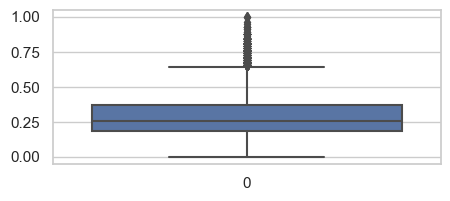

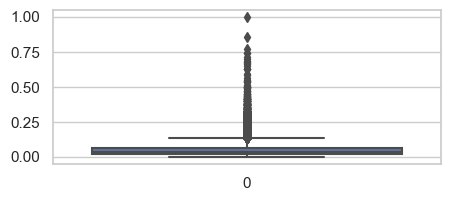

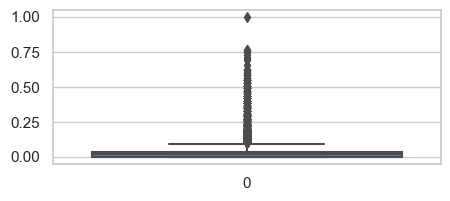

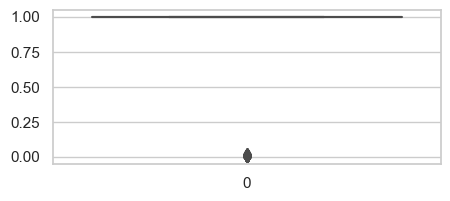

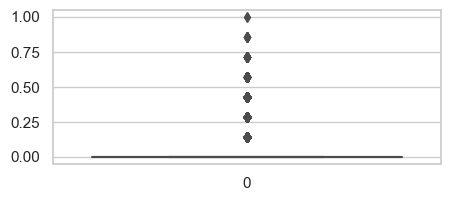

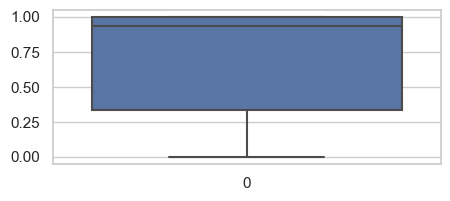

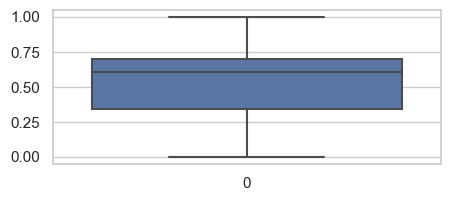

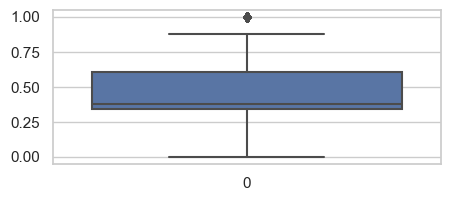

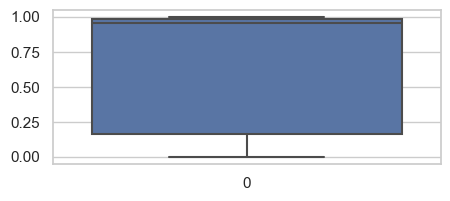

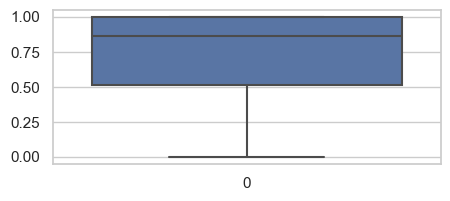

In [219]:
# Crtanje Hist Plot-ova
for col in checkOutliers_bank:
    BoxPlot(normalised_bank_mix[col])

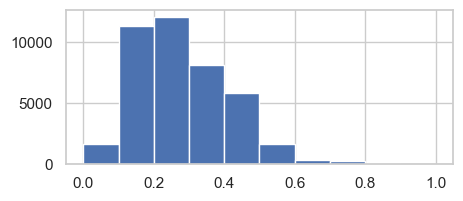

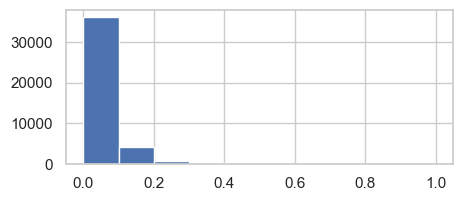

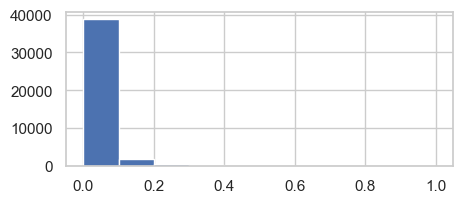

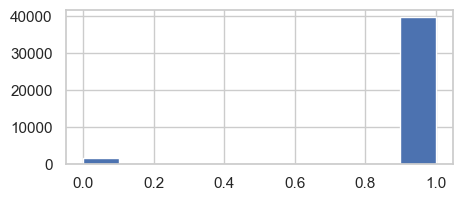

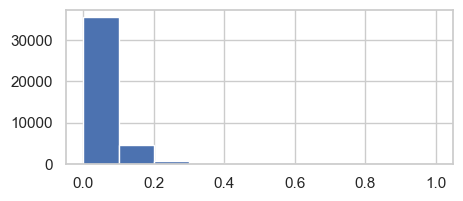

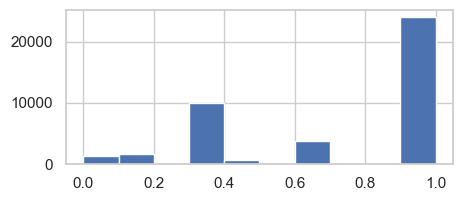

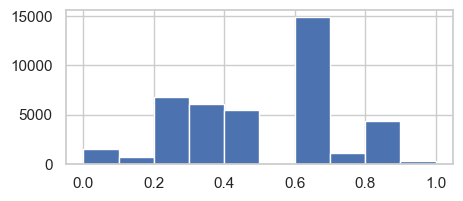

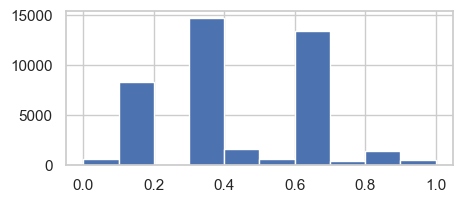

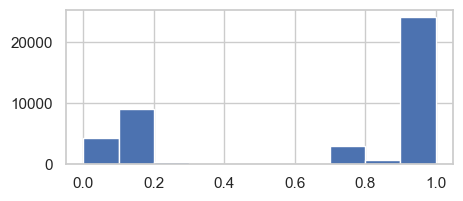

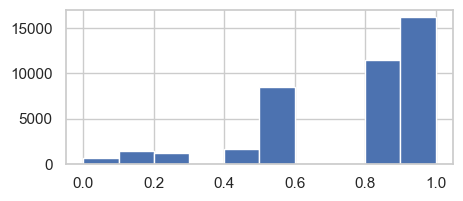

In [220]:
# Crtanje Hist Plot-ova
for col in checkOutliers_bank:
    HistPlot(normalised_bank_mix[col])

Nakon vizualizacije vidi se prisutnost outliera u sledećim atributima

In [221]:
outliers_Bank = ['age','duration','campaign', 'cons.conf.idx']

In [222]:
# Kopiranje dataseta za handlovanje outliera

normalised_bank_mix_ro = normalised_bank_mix.copy()
normalised_bank_mix_io = normalised_bank_mix.copy()
normalised_bank_mix_iso = normalised_bank_mix.copy()


Primecuju se ekstremne vrednosti kod atributa 'age','duration','campaign', 'cons.conf.idx', pa ce se oni obraditi

In [223]:
normalised_bank_mix

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.000000,0.0,0.0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.428571,0.5,0.0,0.0,0.030297,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.428571,0.0,1.0,0.0,0.045954,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.142857,0.0,0.0,0.0,0.030704,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.428571,0.0,0.0,1.0,0.062424,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.714286,0.0,1.0,0.0,0.067914,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.358025,0.714286,0.0,0.0,0.0,0.077877,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,0.481481,0.857143,0.0,1.0,0.0,0.038430,0.018182,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.333333,0.714286,0.0,0.0,0.0,0.089874,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [224]:
impute_outliers(normalised_bank_mix_io,'y')

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.000000,0.0,0.0,0.0,0.053070,0.000000,1.0,0.0,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.493827,0.428571,0.0,0.0,0.0,0.030297,0.000000,1.0,0.0,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.246914,0.428571,0.0,1.0,0.0,0.045954,0.000000,1.0,0.0,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.283951,0.142857,0.0,0.0,0.0,0.030704,0.000000,1.0,0.0,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481481,0.428571,0.0,0.0,0.0,0.062424,0.000000,1.0,0.0,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.648148,0.714286,0.0,1.0,0.0,0.067914,0.000000,1.0,0.0,0.479167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41184,0.358025,0.714286,0.0,0.0,0.0,0.077877,0.000000,1.0,0.0,0.479167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,0.481481,0.857143,0.0,1.0,0.0,0.038430,0.018182,1.0,0.0,0.479167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41186,0.333333,0.714286,0.0,0.0,0.0,0.089874,0.000000,1.0,0.0,0.479167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
impute_specified_outliers(normalised_bank_mix_iso,outliers_Bank)

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.000000,0.0,0.0,0.0,0.053070,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.428571,0.5,0.0,0.0,0.030297,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.428571,0.0,1.0,0.0,0.045954,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.142857,0.0,0.0,0.0,0.030704,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.428571,0.0,0.0,1.0,0.062424,0.000000,1.0,0.000000,0.937500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.648148,0.714286,0.0,1.0,0.0,0.067914,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.358025,0.714286,0.0,0.0,0.0,0.077877,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,0.481481,0.857143,0.0,1.0,0.0,0.038430,0.018182,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.333333,0.714286,0.0,0.0,0.0,0.089874,0.000000,1.0,0.000000,0.479167,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [226]:
# Brisanje outliera
for col in outliers_Bank:
    drop_outliers(normalised_bank_mix_ro,col)

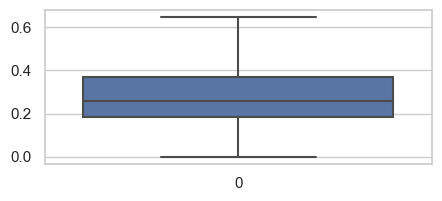

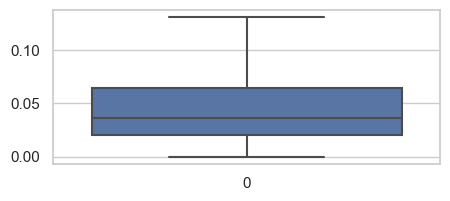

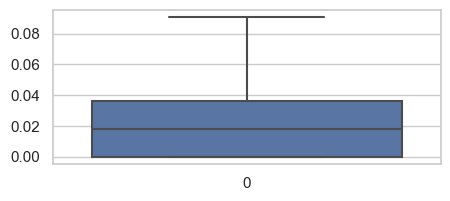

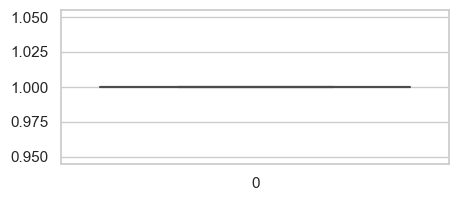

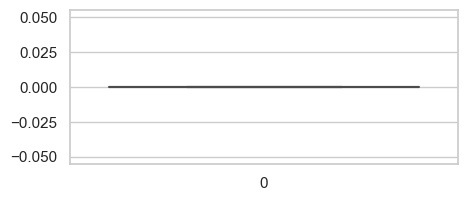

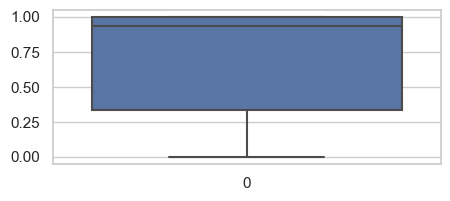

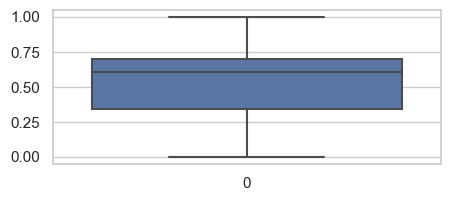

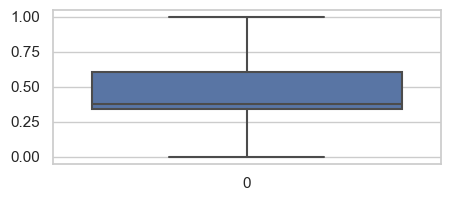

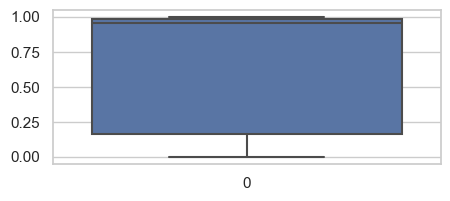

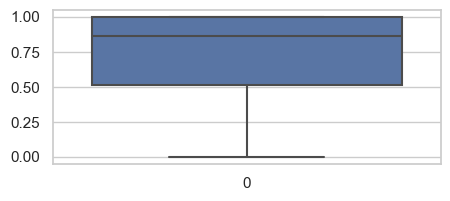

In [228]:
# Crtanje Box Plot-ova nakon imputacije
for col in checkOutliers_bank:
    BoxPlot(normalised_bank_mix_io[col])

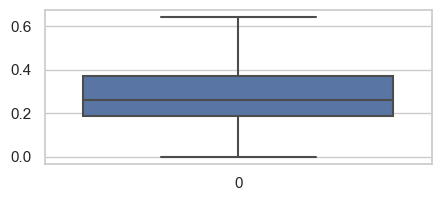

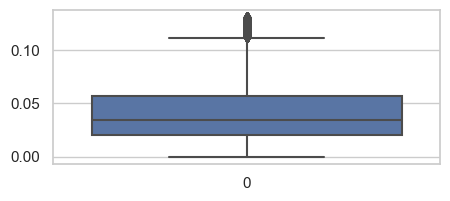

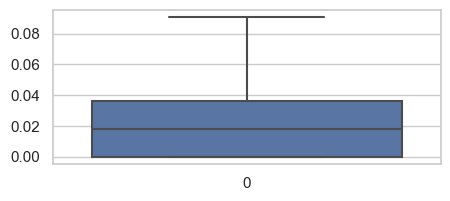

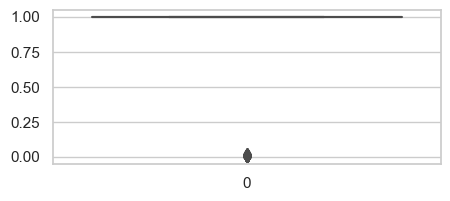

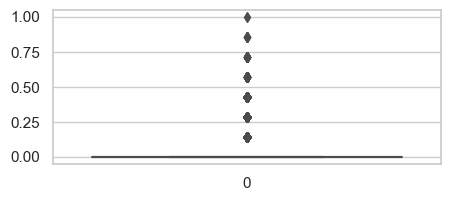

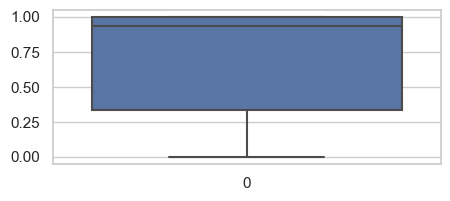

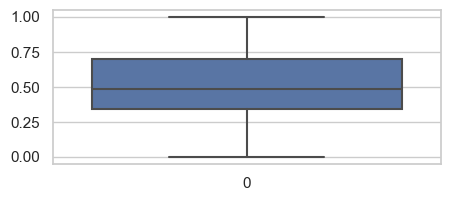

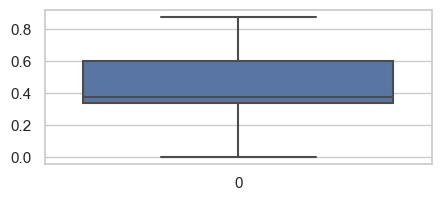

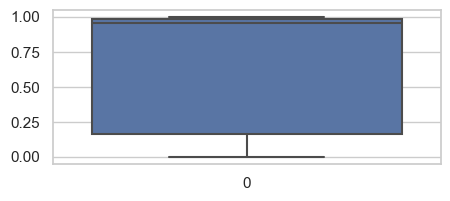

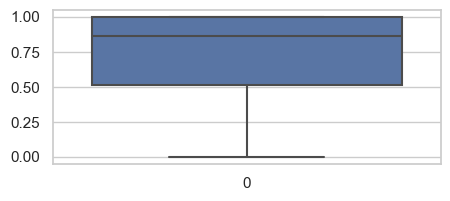

In [229]:
# Crtanje Box Plot-ova nakon brisanja
for col in checkOutliers_bank:
    BoxPlot(normalised_bank_mix_ro[col])

In [230]:
neural_network(normalised_bank_mix_io,'y',"Bank ImputateOutliers","MIX",testingDataframe)
neural_network(normalised_bank_mix_ro,'y',"Bank RemoveOutliers","MIX",testingDataframe)
neural_network(normalised_bank_mix_iso,'y',"Bank ImputeSpecOutliers","MIX",testingDataframe)

258/258 [==============================] - 1s 4ms/step


In [245]:
testingDataframe.iloc[30]

Dataset                     Bank Normalizovan
Enkodiranje                               MIX
Algoritam                                 ANN
F1                                   0.578414
Područje ispod ROC krive             0.741763
Accuracy                               91.42%
Name: 14, dtype: object

In [246]:
testingDataframe.tail(3)

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
2,Bank ImputateOutliers,MIX,ANN,0.529486,0.709442,90.90%
1,Bank RemoveOutliers,MIX,ANN,0.478161,0.684338,93.55%
0,Bank ImputeSpecOutliers,MIX,ANN,0.472430,0.672759,90.59%


Na prvi pogled deluje da je najveći napredak postignut upravo uklanjanjem ekstremnih vrednosti jer se dobija poboljšanje u preciznosti. Ipak, ukoliko se pogledaju mere kao što su F1 i ROC, vidimo da je imputacija bolja opcija.

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Diskretizacija podataka</h2>
</div>

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h3 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Airline dataset</h3>
</div>

Airline skup podataka je jako raznovrsan i zbog toga je izabran kao primer za diskretizaciju podataka. Cilj je pokazati sto vise načina za diskretizaciju, kako nadgledanu tako i nenadgledanu, demonstrirati način razmišljanja i ispitati uticaj diskretizacije na model mašinskog učenja, u ovom slučaju ANN.

In [247]:
discrete_airline_dataset = airlineDataset.copy()

In [248]:
discrete_airline_dataset.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [249]:
discrete_airline_dataset.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [250]:
airline_discretization_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
airline_rating_columns = discrete_airline_dataset.columns[6:20]
airline_rating_columns_names = list(airline_rating_columns)
airline_rating_columns_names

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

Prva diskretizacija je nenadgledana diskretizacija putem KBinsDiscretizera. Kontinualni atribut "Age" se deli u pet jednakih binova odnosno starosnih grupa.

In [251]:
from sklearn.preprocessing import KBinsDiscretizer

# Select the variable to discretize
age = discrete_airline_dataset[['Age']]

# Create a KBinsDiscretizer object with 5 bins
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the age variable
age_binned = kbins.fit_transform(age)

# Print the resulting binned values
discrete_airline_dataset['Age'] = age_binned

In [252]:
discrete_airline_dataset['Arrival Delay in Minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
459.0        1
502.0        1
333.0        1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64

Kako previše vrednosti za kašnjenje ima, a preko pola su bez kašnjenja, deli se nadgledanom diskretizacijom na letove sa kašnjenjem i letove bez kašnjenja.

In [253]:
# Replace values of 0 with 'On time' and values of 1 or more with 'Delayed'
discrete_airline_dataset['Arrival Delay in Minutes'] = discrete_airline_dataset['Arrival Delay in Minutes'].replace(0, 'On time').replace(range(1, int(discrete_airline_dataset['Arrival Delay in Minutes'].max()) + 1), 'Delayed')

# Print the resulting value counts
print(discrete_airline_dataset['Arrival Delay in Minutes'].value_counts())


On time    72753
Delayed    56734
Name: Arrival Delay in Minutes, dtype: int64


In [254]:
# Replace values of 0 with 'On time' and values of 1 or more with 'Delayed'
discrete_airline_dataset['Departure Delay in Minutes'] = discrete_airline_dataset['Departure Delay in Minutes'].replace(0, 'On time').replace(range(1, discrete_airline_dataset['Departure Delay in Minutes'].max() + 1), 'Delayed')

# Print the resulting value counts
print(discrete_airline_dataset['Departure Delay in Minutes'].value_counts())

On time    73209
Delayed    56278
Name: Departure Delay in Minutes, dtype: int64


In [255]:
# definiranje granica intervala za kategorizaciju
bins = [0, 1, 3, 5]

# definiranje oznaka za kategorije
labels = ['Unsatisfied', 'Neutral', 'Satisfied']

# primjena pd.cut() funkcije na odabranim kolonama DataFrame-a
for column in airline_rating_columns_names:
    discrete_airline_dataset[column] = pd.cut(discrete_airline_dataset[column].to_numpy(), bins=bins, labels=labels)


Isto kao i za godine, samo drugačijom strategijom, vrši se diskretizacija dužine leta. Za razliku od ravnomernih binova kod godina, ovde je ideja da se grupišu letovi u tri grupe pomoću kmeans strategije. Ovim načinom, kmeans će podeliti letove u tri grupe, kraći, srednji i dugački.

In [256]:
# Odabir atributa
flight_distance = discrete_airline_dataset[['Flight Distance']]

# Kreiranje KBinsDiscretizer objekta s 3 kategorije
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

# Primjena diskretizacije na atribut Flight Distance
flight_distance_binned = kbins.fit_transform(flight_distance)

# Dodavanje kategorija u dataset
discrete_airline_dataset['Flight Distance'] = flight_distance_binned



Nakon diskretizacije broj jedinstvenih vrednosti je:

In [257]:
for column in discrete_airline_dataset.columns:
    print(discrete_airline_dataset[column].value_counts())

Female    65703
Male      63784
Name: Gender, dtype: int64
Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64
2.0    43375
1.0    41351
3.0    24205
0.0    18830
4.0     1726
Name: Age, dtype: int64
Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64
Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64
0.0    84481
1.0    29710
2.0    15296
Name: Flight Distance, dtype: int64
Neutral        64323
Satisfied      39006
Unsatisfied    22250
Name: Inflight wifi service, dtype: int64
Satisfied      59692
Neutral        43780
Unsatisfied    19351
Name: Departure/Arrival time convenient, dtype: int64
Neutral        60280
Satisfied      41733
Unsatisfied    21808
Name: Ease of Online booking, dtype: int64
Neutral        59830
Satisfied      47730
Unsatisfied    21926
Name: Gate location, dtype: int64
Satisfied      58342
Neutral        55005
Unsatisfied    16010
Name: Food and drink, dtype: int64

In [258]:
discrete_airline_dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.0,Personal Travel,Eco Plus,0.0,Neutral,Satisfied,Neutral,Unsatisfied,...,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Delayed,Delayed,0
1,Male,disloyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Unsatisfied,Unsatisfied,Satisfied,Neutral,Unsatisfied,Satisfied,Unsatisfied,Delayed,Delayed,0
2,Female,Loyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1
3,Female,Loyal Customer,1.0,Business travel,Business,0.0,Neutral,Satisfied,Satisfied,Satisfied,...,Neutral,Neutral,Satisfied,Neutral,Unsatisfied,Satisfied,Neutral,Delayed,Delayed,0
4,Male,Loyal Customer,3.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Satisfied,Satisfied,Neutral,Neutral,Neutral,On time,On time,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Unsatisfied,...,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,0
129876,Male,Loyal Customer,1.0,Business travel,Business,0.0,Satisfied,Satisfied,Satisfied,Satisfied,...,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1
129877,Female,Loyal Customer,0.0,Personal Travel,Eco,0.0,Neutral,Satisfied,Unsatisfied,Satisfied,...,Neutral,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Neutral,On time,On time,0
129878,Male,Loyal Customer,0.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1


Provera kako diskretizacija utiče na performanse učenja

In [259]:
label_encoder = LabelEncoder()
label_encoder.fit(discrete_airline_dataset["satisfaction"])
discrete_airline_dataset["satisfaction"] = label_encoder.transform(discrete_airline_dataset["satisfaction"])
discrete_airline_dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.0,Personal Travel,Eco Plus,0.0,Neutral,Satisfied,Neutral,Unsatisfied,...,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Delayed,Delayed,0
1,Male,disloyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Unsatisfied,Unsatisfied,Satisfied,Neutral,Unsatisfied,Satisfied,Unsatisfied,Delayed,Delayed,0
2,Female,Loyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1
3,Female,Loyal Customer,1.0,Business travel,Business,0.0,Neutral,Satisfied,Satisfied,Satisfied,...,Neutral,Neutral,Satisfied,Neutral,Unsatisfied,Satisfied,Neutral,Delayed,Delayed,0
4,Male,Loyal Customer,3.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Satisfied,Satisfied,Neutral,Neutral,Neutral,On time,On time,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,1.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Unsatisfied,...,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,0
129876,Male,Loyal Customer,1.0,Business travel,Business,0.0,Satisfied,Satisfied,Satisfied,Satisfied,...,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1
129877,Female,Loyal Customer,0.0,Personal Travel,Eco,0.0,Neutral,Satisfied,Unsatisfied,Satisfied,...,Neutral,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Neutral,On time,On time,0
129878,Male,Loyal Customer,0.0,Business travel,Business,0.0,Neutral,Neutral,Neutral,Neutral,...,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,On time,On time,1


In [260]:
discrete_airline_dataset_encoded = discrete_airline_dataset.copy()

In [261]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
discrete_airline_dataset_encoded.iloc[:,categorical_indexes] = discrete_airline_dataset_encoded.iloc[:,categorical_indexes].astype('object')
kategoricki_atributi_airline = discrete_airline_dataset_encoded.select_dtypes(include='object').columns.tolist()

In [262]:
class_map = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
discrete_airline_dataset_encoded['Class'] = discrete_airline_dataset_encoded['Class'].replace(class_map)

In [263]:
for atribut in kategoricki_atributi_airline:
    label_encoder = LabelEncoder()
    label_encoder.fit(discrete_airline_dataset_encoded[atribut])
    discrete_airline_dataset_encoded[atribut] = label_encoder.transform(discrete_airline_dataset_encoded[atribut])

In [264]:
discrete_airline_dataset_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0.0,1,1,0.0,0,1,0,2,...,1,1,0,1,1,1,1,0,0,0
1,1,1,1.0,0,2,0.0,0,0,0,0,...,2,2,1,0,2,1,2,0,0,0
2,0,0,1.0,0,2,0.0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
3,0,0,1.0,0,2,0.0,0,1,1,1,...,0,0,1,0,2,1,0,0,0,0
4,1,0,3.0,0,2,0.0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1.0,0,2,0.0,0,0,0,2,...,1,0,0,1,1,1,1,1,1,0
129876,1,0,1.0,0,2,0.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
129877,0,0,0.0,1,0,0.0,0,1,2,1,...,0,1,0,1,1,1,0,1,1,0
129878,1,0,0.0,0,2,0.0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1


In [265]:
neural_network(discrete_airline_dataset_encoded,'satisfaction',"Airline Diskretizovan","LabelEncoder",testingDataframe)

810/810 [==============================] - 2s 3ms/step


In [266]:
random_forest(discrete_airline_dataset_encoded,'satisfaction',"Airline Diskretizovan","LabelEncoder",testingDataframe)

In [267]:
testingDataframe.tail(2)

,Dataset,Enkodiranje,Algoritam,F1,Područje ispod ROC krive,Accuracy
1,Airline Diskretizovan,LabelEncoder,ANN,0.925582,0.933643,93.63%
0,Airline Diskretizovan,LabelEncoder,RF,0.917287,0.926916,92.84%


Iako su značajno bolji rezultati postignuti kod ANN u odnosu na početni skup podataka(čak 3%), diskretizacija nije donela poboljšanje kao što je to učinilo skaliranje, iz prostog razloga zbog gubitka određenog dela informacije. Sa druge strane, gubitak informacija je uticao čak i RF koji očekuje diskretne vrednosti, što nam govori na treba biti oprezan prilikom diskretizacije.

<div style="border-radius:10px;
            background-color:#D6EAF8;
            letter-spacing:0.5px; text-align: center;">
            
<h2 style="padding: 5px 0px; color:#2980B9; font-weight: bold; font-family: Arial, sans-serif;">
Promena raspodele podataka</h2>
</div>

In [268]:
vehiclesDataset = vehiclesDataset.drop(['angle', 'pos', 'lane', 'slope', 'signals', 'posLat'], axis=1)\
       .rename(columns={'x': 'longitude', 'y': 'latitude'})\
       .assign(speed_kmh=lambda x: round(x['speed'] * 3.6, 2))\
       .drop(['speed'],axis=1)


In [269]:
vehiclesDataset.dtypes

timestep          int64
id               object
longitude       float64
latitude        float64
type             object
acceleration    float64
distance        float64
odometer        float64
speed_kmh       float64
dtype: object

In [270]:
vehiclesDataset.head(10)

,timestep,id,longitude,latitude,type,acceleration,distance,odometer,speed_kmh
0,0,bus0,-104.996667,39.732112,bus_bus,0.00,12.10,0.00,0.00
1,0,veh0,-104.990763,39.725715,veh_passenger,0.00,5.10,0.00,0.00
2,1,bus0,-104.996674,39.732112,bus_bus,0.62,12.72,0.62,2.23
3,1,veh0,-104.990736,39.725715,veh_passenger,2.34,7.44,2.34,8.42
4,1,veh1,-104.990296,39.729562,veh_passenger,0.00,5.10,0.00,0.00
5,1,veh2,-104.960328,39.727314,veh_passenger,0.00,5.10,0.00,0.00
6,2,bus0,-104.996692,39.732112,bus_bus,0.95,14.29,2.19,5.65
7,2,bus1,-105.024910,39.747560,bus_bus,0.00,12.10,0.00,0.00
8,2,veh0,-104.990692,39.725715,veh_passenger,1.44,11.22,6.12,13.61
9,2,veh1,-104.990303,39.729573,veh_passenger,1.38,6.48,1.38,4.97


In [271]:
vehiclesDataset = vehiclesDataset[['id','timestep','type','latitude','longitude','speed_kmh','acceleration','distance','odometer']]

In [272]:
vehiclesDataset.head(10)

,id,timestep,type,latitude,longitude,speed_kmh,acceleration,distance,odometer
0,bus0,0,bus_bus,39.732112,-104.996667,0.00,0.00,12.10,0.00
1,veh0,0,veh_passenger,39.725715,-104.990763,0.00,0.00,5.10,0.00
2,bus0,1,bus_bus,39.732112,-104.996674,2.23,0.62,12.72,0.62
3,veh0,1,veh_passenger,39.725715,-104.990736,8.42,2.34,7.44,2.34
4,veh1,1,veh_passenger,39.729562,-104.990296,0.00,0.00,5.10,0.00
5,veh2,1,veh_passenger,39.727314,-104.960328,0.00,0.00,5.10,0.00
6,bus0,2,bus_bus,39.732112,-104.996692,5.65,0.95,14.29,2.19
7,bus1,2,bus_bus,39.747560,-105.024910,0.00,0.00,12.10,0.00
8,veh0,2,veh_passenger,39.725715,-104.990692,13.61,1.44,11.22,6.12
9,veh1,2,veh_passenger,39.729573,-104.990303,4.97,1.38,6.48,1.38


In [273]:
vehiclesDataset['type'] = vehiclesDataset['type'].replace({'bus_bus':'bus', 'veh_passenger':'car'})


In [274]:
vehiclesDataset['timestep'].nunique()

75

In [275]:
vehiclesDataset['time_of_day'] = vehiclesDataset['timestep'].apply(lambda x: 'morning' if x < 61 else ('afternoon' if 61 <= x <= 899 else 'evening'))
vehiclesDataset.drop(['timestep','id'],axis=1)

,type,latitude,longitude,speed_kmh,acceleration,distance,odometer,time_of_day
0,bus,39.732112,-104.996667,0.00,0.00,12.10,0.00,morning
1,car,39.725715,-104.990763,0.00,0.00,5.10,0.00,morning
2,bus,39.732112,-104.996674,2.23,0.62,12.72,0.62,morning
3,car,39.725715,-104.990736,8.42,2.34,7.44,2.34,morning
4,car,39.729562,-104.990296,0.00,0.00,5.10,0.00,morning
...,...,...,...,...,...,...,...,...
18947,car,39.740587,-104.992876,56.59,-4.50,102.64,2142.57,evening
18948,car,39.754406,-104.985458,68.98,-0.58,92.83,2811.17,evening
18949,car,39.748118,-104.986578,24.05,-1.64,77.25,2318.51,evening
18950,car,39.727299,-104.999915,29.09,1.71,12.38,3416.51,evening


In [276]:
vehiclesDataset['time_of_day'].value_counts()

afternoon    10473
morning       5513
evening       2966
Name: time_of_day, dtype: int64

In [277]:
morning_df = vehiclesDataset[vehiclesDataset['time_of_day'] == 'morning']


In [278]:
afternoon_df = vehiclesDataset[vehiclesDataset['time_of_day'] == 'afternoon']


In [279]:
evening_df = vehiclesDataset[vehiclesDataset['time_of_day'] == 'evening']


In [280]:
morning_df.describe()

,timestep,latitude,longitude,speed_kmh,acceleration,distance,odometer
count,5513.000000,5513.000000,5513.000000,5513.000000,5513.000000,5513.000000,5513.000000
mean,40.239434,39.739556,-104.993136,32.581692,0.258085,58.748538,181.331818
std,14.466868,0.008658,0.018455,23.210573,1.613329,59.827842,176.000577
min,0.000000,39.716626,-105.034328,0.000000,-4.500000,0.040000,0.000000
25%,30.000000,39.732114,-105.005819,12.560000,-0.130000,17.270000,38.680000
50%,43.000000,39.740047,-104.991924,33.910000,0.370000,42.600000,130.850000
75%,52.000000,39.747521,-104.978158,47.990000,1.330000,82.850000,272.890000
max,60.000000,39.759578,-104.958775,113.470000,2.600000,655.440000,942.740000


In [281]:
afternoon_df.describe()

,timestep,latitude,longitude,speed_kmh,acceleration,distance,odometer
count,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000
mean,404.919794,39.741676,-104.991493,30.037755,-0.027314,73.497304,1539.186814
std,3.112891,0.007354,0.013903,24.783815,1.631226,74.595681,1028.864775
min,400.000000,39.723526,-105.026485,0.000000,-4.500000,0.000000,0.000000
25%,402.000000,39.736918,-105.001553,2.560000,-0.260000,27.530000,691.040000
50%,405.000000,39.741943,-104.990188,30.850000,0.000000,59.800000,1408.140000
75%,408.000000,39.747503,-104.982310,47.300000,0.940000,93.630000,2300.550000
max,410.000000,39.765507,-104.959217,114.160000,2.600000,916.740000,4799.790000


In [282]:
evening_df.describe()

,timestep,latitude,longitude,speed_kmh,acceleration,distance,odometer
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,908.782873,39.741212,-104.991451,28.474042,-0.033146,74.756699,2065.340246
std,0.719324,0.007425,0.014125,25.147804,1.519033,72.061923,1480.421012
min,908.000000,39.722289,-105.026160,0.000000,-4.500000,0.100000,0.000000
25%,908.000000,39.736914,-104.999986,0.290000,-0.190000,29.935000,836.827500
50%,909.000000,39.741598,-104.991188,27.665000,0.000000,61.990000,1845.360000
75%,909.000000,39.747437,-104.981708,46.910000,0.840000,96.750000,3022.145000
max,910.000000,39.756143,-104.959774,102.600000,2.590000,750.250000,7546.980000


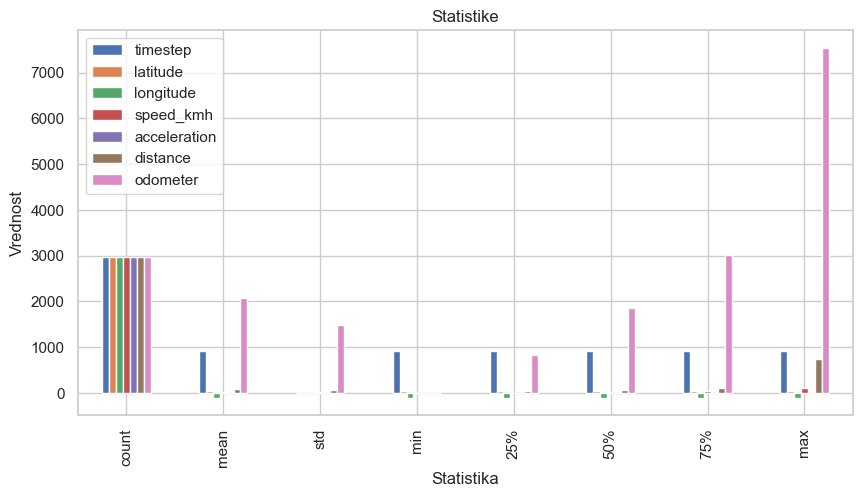

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka i računanje statistika

stats = evening_df.describe()

# Kreiranje grafikona
fig, ax = plt.subplots(figsize=(10, 5))
stats.plot(kind='bar', ax=ax)

# Podešavanje naslova i oznaka osa
ax.set_title('Statistike')
ax.set_xlabel('Statistika')
ax.set_ylabel('Vrednost')

# Prikazivanje grafikona
plt.show()


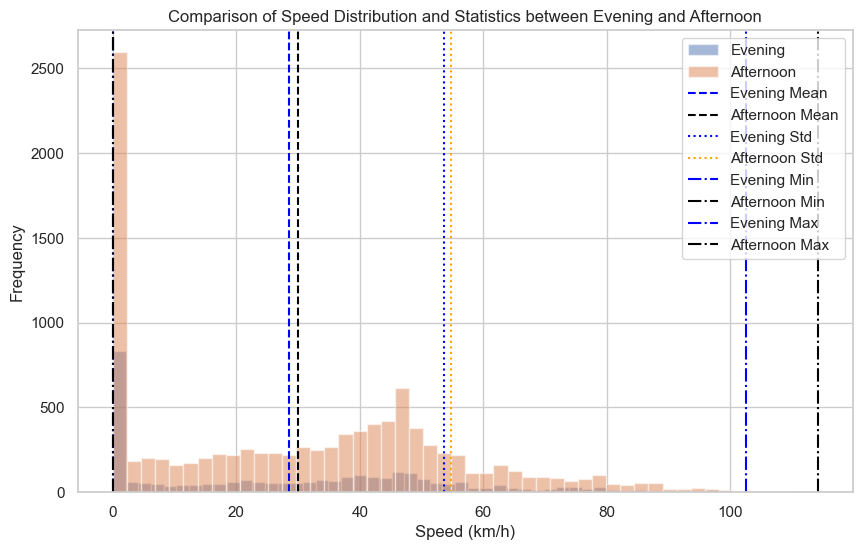

In [284]:
import matplotlib.pyplot as plt

# Prikaz histograma brzine za svaki skup
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(evening_df['speed_kmh'], bins=50, alpha=0.5, label='Evening')
ax.hist(afternoon_df['speed_kmh'], bins=50, alpha=0.5, label='Afternoon')

# Dodavanje traka za prikaz statističkih mjera za svaki skup
evening_stats = evening_df.describe()['speed_kmh']
afternoon_stats = afternoon_df.describe()['speed_kmh']
ax.axvline(evening_stats['mean'], color='blue', linestyle='--', label='Evening Mean')
ax.axvline(afternoon_stats['mean'], color='black', linestyle='--', label='Afternoon Mean')
ax.axvline(evening_stats['std']+evening_stats['mean'], color='blue', linestyle=':', label='Evening Std')
ax.axvline(afternoon_stats['std']+afternoon_stats['mean'], color='orange', linestyle=':', label='Afternoon Std')
ax.axvline(evening_stats['min'], color='blue', linestyle='-.', label='Evening Min')
ax.axvline(afternoon_stats['min'], color='black', linestyle='-.', label='Afternoon Min')
ax.axvline(evening_stats['max'], color='blue', linestyle='-.', label='Evening Max')
ax.axvline(afternoon_stats['max'], color='black', linestyle='-.', label='Afternoon Max')

# Postavljanje naziva i legendi za grafikon
ax.set_title('Comparison of Speed Distribution and Statistics between Evening and Afternoon')
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


In [285]:
import matplotlib.pyplot as plt
def prikazi_mere(column):
    # Prikaz histograma brzine za svaki skup
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(evening_df[column], bins=50, alpha=0.5, label='Evening')
    ax.hist(afternoon_df[column], bins=50, alpha=0.5, label='Afternoon')
    ax.hist(morning_df[column], bins=50, alpha=0.5, label='Morning')

    # Dodavanje traka za prikaz statističkih mjera za svaki skup
    evening_stats = evening_df.describe()[column]
    afternoon_stats = afternoon_df.describe()[column]
    morning_stats = morning_df.describe()[column]

    ax.axvline(evening_stats['mean'], color='blue', linestyle='--', label='Evening Mean')
    ax.axvline(afternoon_stats['mean'], color='black', linestyle='--', label='Afternoon Mean')
    ax.axvline(morning_stats['mean'], color='green', linestyle='--', label='Morning Mean')

    ax.axvline(evening_stats['std']+evening_stats['mean'], color='blue', linestyle=':', label='Evening Std')
    ax.axvline(afternoon_stats['std']+afternoon_stats['mean'], color='orange', linestyle=':', label='Afternoon Std')
    ax.axvline(morning_stats['std']+morning_stats['mean'], color='purple', linestyle=':', label='Morning Std')

    ax.axvline(evening_stats['min'], color='blue', linestyle='-.', label='Evening Min')
    ax.axvline(afternoon_stats['min'], color='black', linestyle='-.', label='Afternoon Min')
    ax.axvline(morning_stats['min'], color='green', linestyle='-.', label='Morning Min')

    ax.axvline(evening_stats['max'], color='blue', linestyle='-.', label='Evening Max')
    ax.axvline(afternoon_stats['max'], color='black', linestyle='-.', label='Afternoon Max')
    ax.axvline(morning_stats['max'], color='green', linestyle='-.', label='Morning Max')

    # Postavljanje naziva i legendi za grafikon
    ax.set_title('Comparison of Distribution and Statistics between Evening, Morning and Afternoon')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.show()


In [286]:
num_cols = vehiclesDataset.select_dtypes(include=['int', 'float']).columns.tolist()


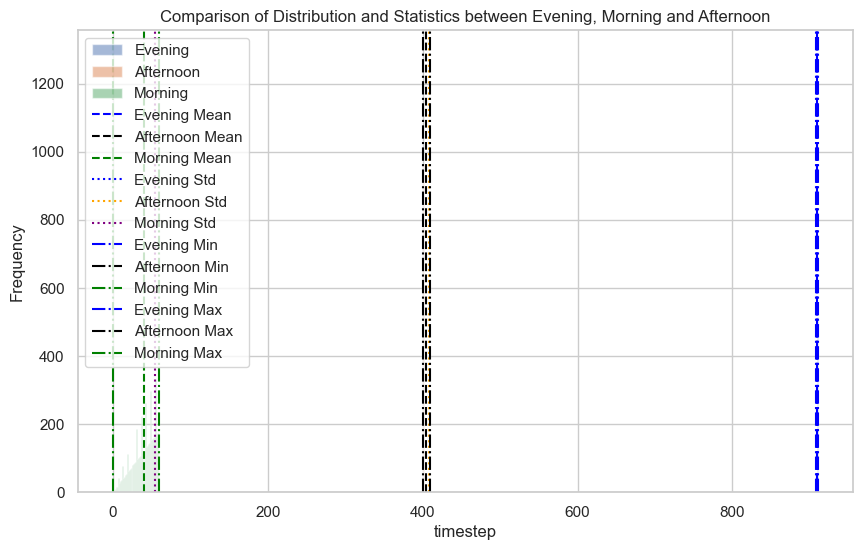

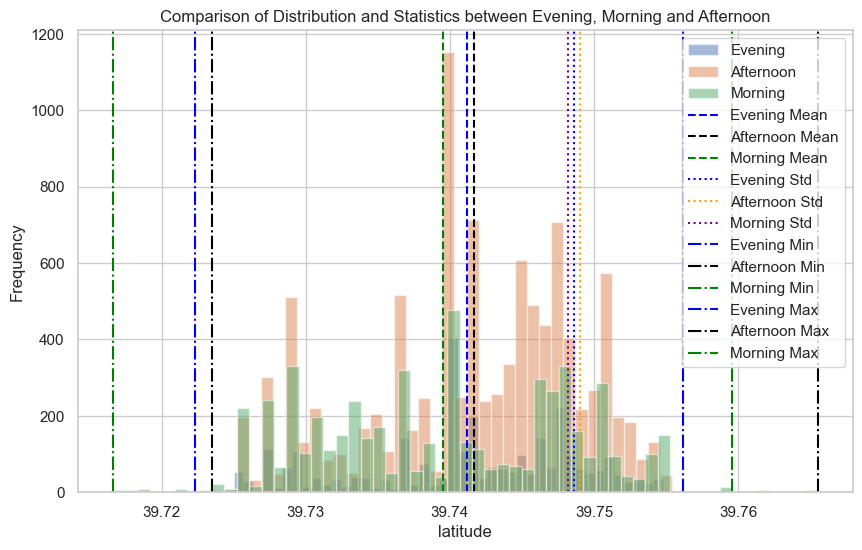

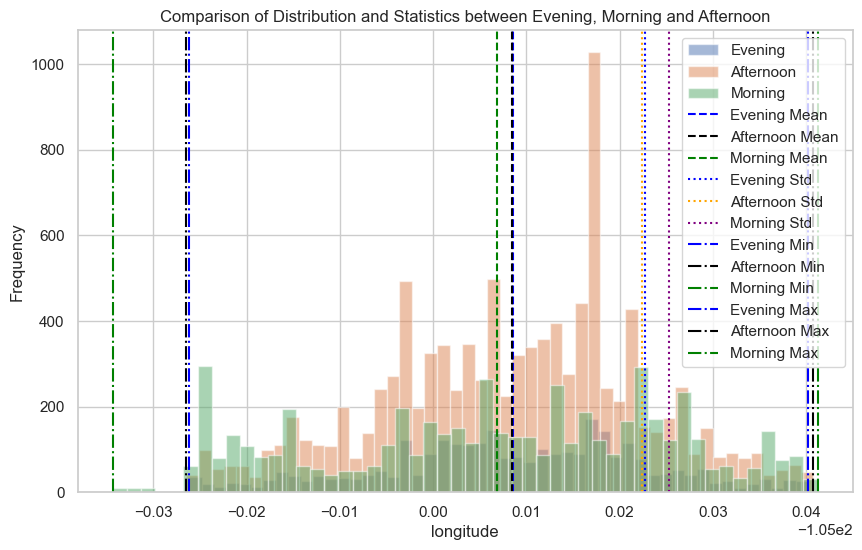

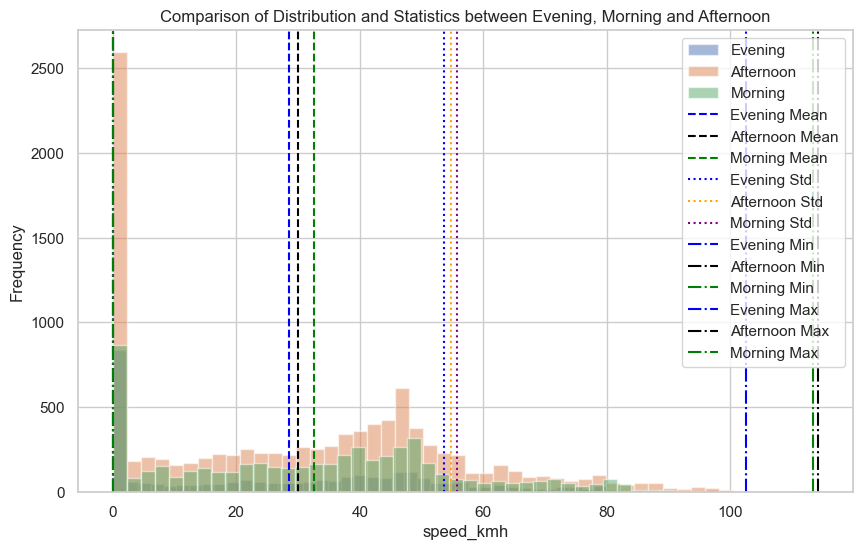

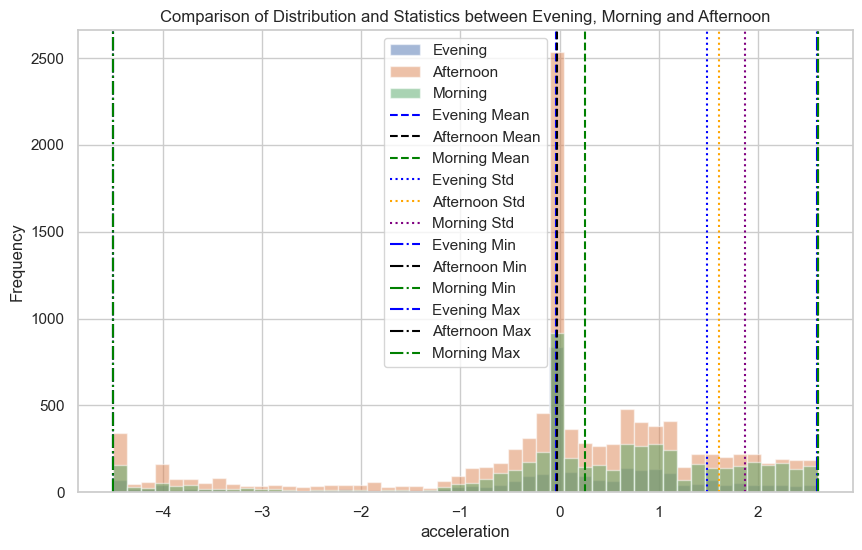

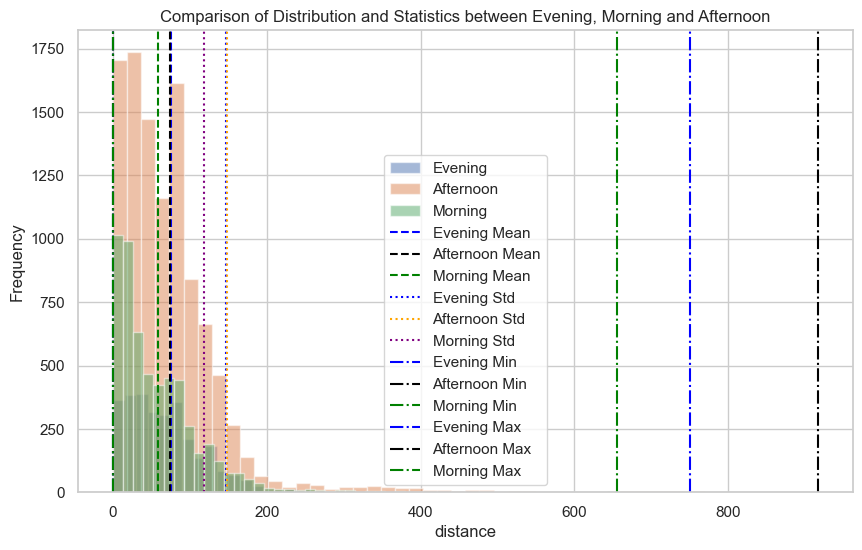

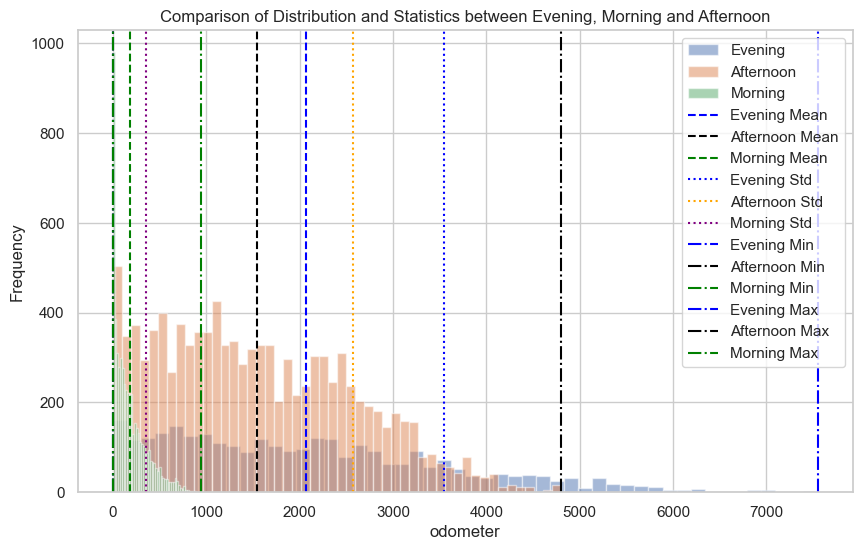

In [287]:
for col in num_cols:
    prikazi_mere(col)

Poredjenjem statističkih parametara iz tri različita dela dana uočava se značajna razlika. Zbog toga dolazi do promene distribucije podataka i ona potencijalno može biti opasna i rezultovati lošim performansama modela na novom skupu podataka.